In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd 
from matplotlib import pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_temps=session.query(Measurement).filter(extract('month',Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
temps=[temp.tobs for temp in June_temps]
temps

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df=pd.DataFrame(temps,columns=['June_Temperatures'])
df

,June_Temperatures
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June_Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
December_temps = session.query(Measurement).filter(extract('month',Measurement.date)==12).all()


In [9]:
# 7. Convert the December temperatures to a list.
Dec_temps_list = [ temp.tobs for temp in December_temps]

Dec_temps_list 

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [38]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temps_df = pd.DataFrame(Dec_temps_list,columns=['Dec_Temperatures'])

In [39]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temps_df.describe()

,Dec_Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 0, 'Temperature(F)')

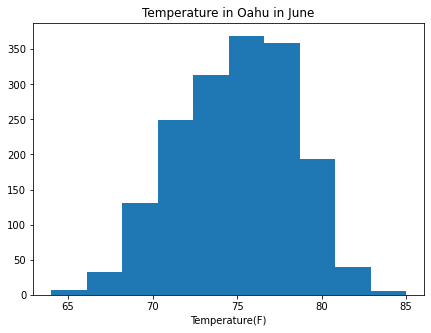

In [34]:
#create histograms of temperature information for June 
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(df)
ax.set_title("Temperature in Oahu in June")
ax.set_xlabel("Temperature(F)")


Text(0.5, 0, 'Temperature(F)')

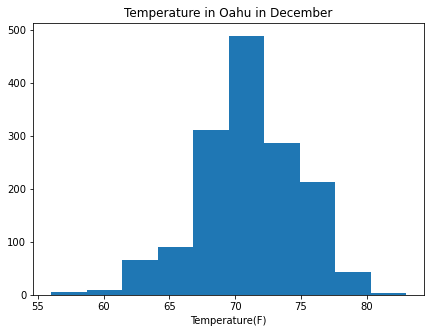

In [37]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(Dec_temps_df)
ax.set_title("Temperature in Oahu in December")
ax.set_xlabel("Temperature(F)")


In [42]:
precip=[precip.prcp for precip in June_temps]
June_rain= pd.DataFrame(precip, columns=['June_rainfall'])
June_rain

,June_rainfall
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [43]:
June_rain.describe()

,June_rainfall
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


Text(0.5, 0, 'Inches of rainfall')

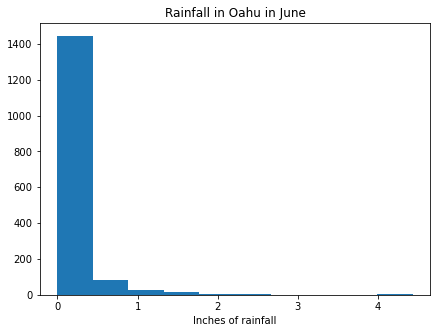

In [44]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(June_rain)
ax.set_title("Rainfall in Oahu in June")
ax.set_xlabel("Inches of rainfall")


In [46]:
precip=[precip.prcp for precip in December_temps]
Dec_rain= pd.DataFrame(precip, columns=['Dec_rainfall'])
Dec_rain

,Dec_rainfall
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [47]:
Dec_rain.describe()

,Dec_rainfall
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


Text(0.5, 0, 'Inches of rainfall')

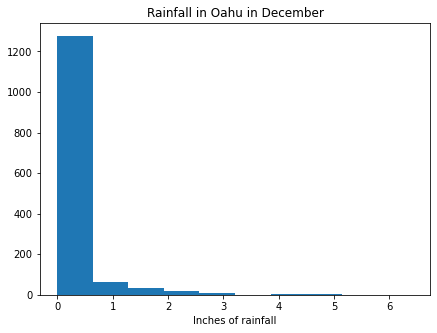

In [48]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(Dec_rain)
ax.set_title("Rainfall in Oahu in December")
ax.set_xlabel("Inches of rainfall")

In [53]:
June_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   June_rainfall  1574 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


In [54]:
Dec_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dec_rainfall  1405 non-null   float64
dtypes: float64(1)
memory usage: 12.0 KB


In [59]:
#Which stations were the most used in december 
dec_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    filter(extract('month',Measurement.date)==12).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [62]:
dec_stations_df= pd.DataFrame(dec_stations, columns=['station','count of result'])
dec_stations_df

,station,count of result
0,USC00519281,217
1,USC00513117,216
2,USC00519523,210
3,USC00519397,210
4,USC00516128,206
5,USC00514830,178
6,USC00511918,152
7,USC00517948,109
8,USC00518838,19


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

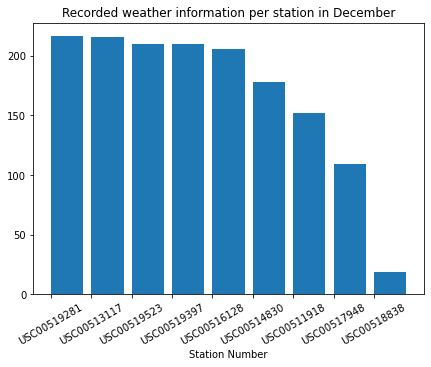

In [79]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(dec_stations_df['station'], height= dec_stations_df['count of result'], align='edge')
ax.set_title("Recorded weather information per station in December")
ax.set_xlabel("Station Number")
plt.xticks(rotation=30)

In [76]:
#which stations were used most in June 
June_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    filter(extract('month',Measurement.date)==6).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [77]:
June_stations_df=pd.DataFrame(June_stations, columns=['station','count of result'])
June_stations_df

,station,count of result
0,USC00519397,236
1,USC00519281,236
2,USC00513117,236
3,USC00519523,232
4,USC00516128,223
5,USC00514830,186
6,USC00511918,165
7,USC00517948,148
8,USC00518838,38


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

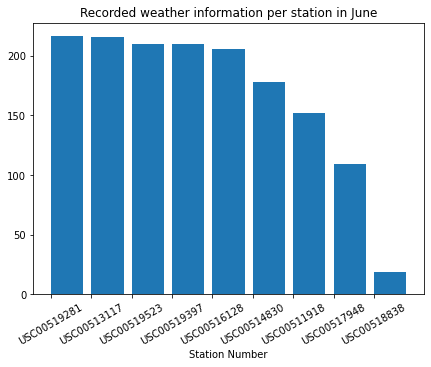

In [80]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(dec_stations_df['station'], height= dec_stations_df['count of result'], align='edge')
ax.set_title("Recorded weather information per station in June")
ax.set_xlabel("Station Number")
plt.xticks(rotation=30)